In [18]:
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [7]:
latitude = [43.98, 42.81, 41.31, 41.18, 41.35, 41.82, 44.48, 43.66, 42.87, 41.48, 41.35, 41.88, 42.39, 41.95, 41.77, 42.76, 44, 41.29, 41.07, 41.16, 41.61, 41.44, 41.45, 41.76, 44.77, 44.9, 44.36, 44, 42.35, 42.55, 42.16, 42.11, 41.72, 42.06, 42.12, 42.09, 43.2, 43.04, 42.96, 43, 41.78, 41.92]

longitude = [-75.91, -73.94, -72.92, -73.19, -72.14, -71.41, -73.21, -70.26, -72.87,-72.52,-72.14, -71.11, -71.08, -70.66, -70.51, -72.51, -69.67, -73.11, -73.52, -73.23, -72.61, -71.98, -72.86, -72.08, -70.56, -68.77, -68.7, -70.01, -70.91,-70.93, -71.99, -71.71, -71.1, -72.71, -71.42, -72.43, -71.34, -70.95, -70.89, -71.46, -71.47, -71.57]

file = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/GenericBatchFileWithInfo.csv')
em_info = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/StateRatesInfo.csv')

# origional rates in lbs/kWh so convert them to be in tons/MWh to be consistent
BIT_carb = 2.26  / 0.001 / 2000 
NG_carb = 0.97  / 0.001 / 2000 
WND_carb = 0
RFO_carb = 2.46 / 0.001 / 2000 
NUC_carb = 0

# cost_nature = 185 / 1.102

num_gen = 42

# store fuel type of each generator
fuel_type = file['Fuel Type'].to_numpy()
cost_biden = 51 / 1.102
cost_nature = 185 / 1.102

state = file['stid'].to_numpy()
w = np.zeros((4,42))
# print(state[i])
for i in range(num_gen):
    em = em_info.loc[em_info['State ID'] == state[i], ['Fuel Type','Emissions Type', 'Emissions Rate']]
    em = em.loc[em['Fuel Type'] == fuel_type[i], ['Emissions Type', 'Emissions Rate']].to_numpy()

    w[0,i] = em[0][1] / 2000
    w[1,i] = em[1][1] / 2000
    w[2,i] = em[2][1] / 2000 
    w[3,i] = em[3][1] / 2000


    # if (i ==10):
    #     print("em:",em)
    #     print("c:",w)
    # NO2.append(MW * em[0][1])
    # SO2.append(MW * em[1][1])
    # PM25.append(MW * em[2][1])
    # VOC.append(MW * em[3][1])

w[0,0] = 0
w[1,0] = 0
w[2,0] = 0
w[3,0] = 0


In [8]:
# load in generation amounts

# print(len(longitude))
# gen_high = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/gen_high.csv')
# gen_low = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/gen_low.csv')
# gen_carbon = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/gen_carbon.csv')
# gen_orig = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/gen_original.csv')
# gen_carbon_cost =pd.read_csv('/Users/elizabethrogers/Desktop/Matlab Projects/RSRG Testing/Fall116carboncostGeneratorresults.csv')

gen_og = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116originalGeneratorresults.csv')
gen_low = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116LowHealthBoundGeneratorresults.csv')
gen_high = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116HighHealthBoundGeneratorresults.csv')
gen_carboncost = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116carboncostGeneratorresults.csv')
gen_carbonemi = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116CarbonEmiGeneratorresults.csv')

In [9]:
colors = []

for i in range(42):
    if(fuel_type[i] == 'NG'):
        colors.append('xkcd:sky blue')
    elif(fuel_type[i] == 'RFO'):
        colors.append('tab:olive')
    elif(fuel_type[i] == 'BIT'):
        colors.append('tab:brown')
    elif(fuel_type[i] == 'WND'):
        colors.append('tab:green')
    else:
        colors.append('tab:red')

In [27]:
print(gen_og)

    Generation: Original Model
0                   338.000000
1                   555.595459
2                   648.359128
3                   189.000000
4                  1406.000000
5                   288.000000
6                   120.000000
7                   216.000000
8                   125.000000
9                   241.000000
10                  163.000000
11                  664.000000
12                  295.000000
13                  924.000000
14                  143.619170
15                  100.000000
16                  208.000000
17                  320.000000
18                  854.390614
19                  208.000000
20                  728.000000
21                  299.190135
22                  263.000000
23                  828.476794
24                  130.000000
25                  163.328107
26                  176.000000
27                  169.000000
28                  916.000000
29                  161.000000
30                  180.000000
31      

/var/folders/_h/gc6w8m4s5m53hzmb_9s77s980000gp/T/ipykernel_23229/3869040335.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  map.scatter(x, y, s=gen_og.to_numpy(), c=colors, cmap='viridis', marker='o', alpha=0.7)


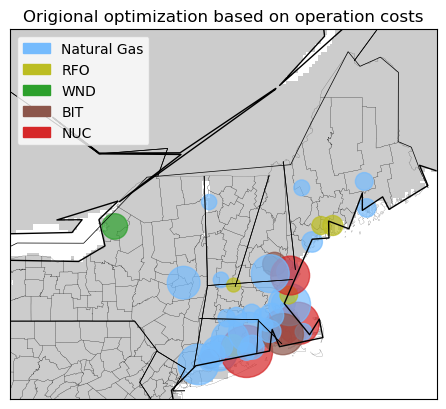

In [10]:
map = Basemap(
   projection='merc', llcrnrlat=min(latitude)-0.75, urcrnrlat=max(latitude)+3,
   llcrnrlon=min(longitude)-3, urcrnrlon=max(longitude)+2, resolution='c')

map.drawcoastlines()
map.drawstates()
# map.drawcoastlines()
map.drawcounties()
map.drawcountries()
map.drawlsmask(land_color='0.8', ocean_color='w', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=5)

# first graph based on original

x, y = map(longitude, latitude)  # Projecting latitudes and longitudes to map coordinates
map.scatter(x, y, s=gen_og.to_numpy(), c=colors, cmap='viridis', marker='o', alpha=0.7)

# m.scatter(x,y,3,marker='o',color='k')


# Adding a colorbar to represent the data values
# plt.colorbar(label='Data Values')

natGas = mpatches.Patch(color='xkcd:sky blue', label='Natural Gas')
oil = mpatches.Patch(color='tab:olive', label='RFO')
wind = mpatches.Patch(color='tab:green', label='WND')
bit = mpatches.Patch(color='tab:brown', label='BIT')
nuc = mpatches.Patch(color='tab:red', label='NUC')

plt.legend(handles=[natGas,oil,wind,bit,nuc])

# Display the map with plotted data
plt.title('Origional optimization based on operation costs')
plt.show()

/var/folders/_h/gc6w8m4s5m53hzmb_9s77s980000gp/T/ipykernel_42513/1556876615.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  carbon.scatter(x, y, s=gen_carboncost.to_numpy(), c=colors, cmap='viridis', marker='o', alpha=0.7)


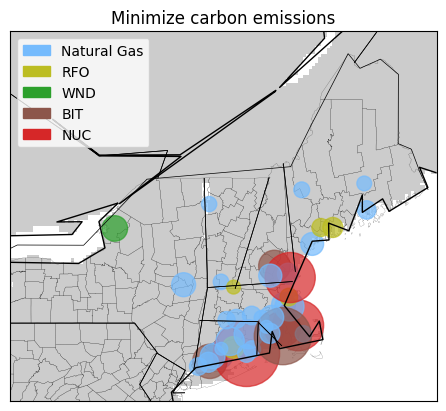

In [29]:
# graphing carbon costs
carbon = Basemap(
   projection='merc', llcrnrlat=min(latitude)-0.75, urcrnrlat=max(latitude)+3,
   llcrnrlon=min(longitude)-3, urcrnrlon=max(longitude)+2, resolution='c')

carbon.drawcoastlines()
carbon.drawstates()
carbon.drawcounties()
carbon.drawcountries()
carbon.drawlsmask(land_color='0.8', ocean_color='w', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=5)

# first graph based on original

x, y = carbon(longitude, latitude)  # Projecting latitudes and longitudes to map coordinates
carbon.scatter(x, y, s=gen_carboncost.to_numpy(), c=colors, cmap='viridis', marker='o', alpha=0.7)

# m.scatter(x,y,3,marker='o',color='k')


# Adding a colorbar to represent the data values
# plt.colorbar(label='Data Values')

natGas = mpatches.Patch(color='xkcd:sky blue', label='Natural Gas')
oil = mpatches.Patch(color='tab:olive', label='RFO')
wind = mpatches.Patch(color='tab:green', label='WND')
bit = mpatches.Patch(color='tab:brown', label='BIT')
nuc = mpatches.Patch(color='tab:red', label='NUC')

plt.legend(handles=[natGas,oil,wind,bit,nuc])

# Display the map with plotted data
plt.title('Minimize carbon emissions')
plt.show()

/var/folders/_h/gc6w8m4s5m53hzmb_9s77s980000gp/T/ipykernel_42513/2381630111.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  health.scatter(x, y, s=gen_low.to_numpy(), c=colors, cmap='viridis', marker='o', alpha=0.7)


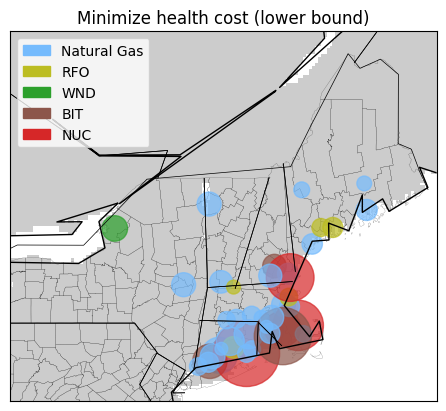

In [30]:
# graphing lower health costs
health = Basemap(
   projection='merc', llcrnrlat=min(latitude)-0.75, urcrnrlat=max(latitude)+3,
   llcrnrlon=min(longitude)-3, urcrnrlon=max(longitude)+2, resolution='c')

health.drawcoastlines()
health.drawstates()
health.drawcounties()
health.drawcountries()
health.drawlsmask(land_color='0.8', ocean_color='w', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=5)

# first graph based on original

x, y = health(longitude, latitude)  # Projecting latitudes and longitudes to map coordinates
health.scatter(x, y, s=gen_low.to_numpy(), c=colors, cmap='viridis', marker='o', alpha=0.7)

# m.scatter(x,y,3,marker='o',color='k')


# Adding a colorbar to represent the data values
# plt.colorbar(label='Data Values')

natGas = mpatches.Patch(color='xkcd:sky blue', label='Natural Gas')
oil = mpatches.Patch(color='tab:olive', label='RFO')
wind = mpatches.Patch(color='tab:green', label='WND')
bit = mpatches.Patch(color='tab:brown', label='BIT')
nuc = mpatches.Patch(color='tab:red', label='NUC')

plt.legend(handles=[natGas,oil,wind,bit,nuc])

# Display the map with plotted data
plt.title('Minimize health cost (lower bound)')
plt.show()

/var/folders/_h/gc6w8m4s5m53hzmb_9s77s980000gp/T/ipykernel_42513/2782561744.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  health2.scatter(x, y, s=gen_high.to_numpy(), c=colors, cmap='viridis', marker='o', alpha=0.7)


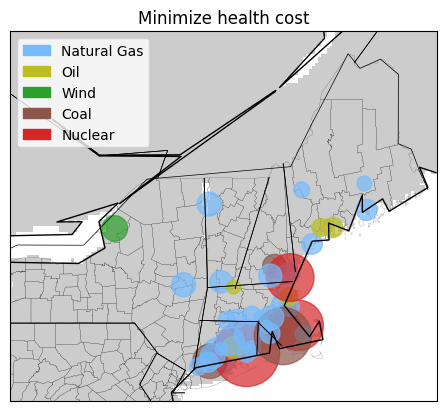

In [83]:
# graphing upper bound health costs
health2 = Basemap(
   projection='merc', llcrnrlat=min(latitude)-0.75, urcrnrlat=max(latitude)+3,
   llcrnrlon=min(longitude)-3, urcrnrlon=max(longitude)+2, resolution='c')

health2.drawcoastlines()
health2.drawstates()
health2.drawcounties()
health2.drawcountries()
health2.drawlsmask(land_color='0.8', ocean_color='w', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=5)

# first graph based on original

x, y = health2(longitude, latitude)  # Projecting latitudes and longitudes to map coordinates
health2.scatter(x, y, s=gen_high.to_numpy(), c=colors, cmap='viridis', marker='o', alpha=0.7)

# m.scatter(x,y,3,marker='o',color='k')


# Adding a colorbar to represent the data values
# plt.colorbar(label='Data Values')

natGas = mpatches.Patch(color='xkcd:sky blue', label='Natural Gas')
oil = mpatches.Patch(color='tab:olive', label='Oil')
wind = mpatches.Patch(color='tab:green', label='Wind')
bit = mpatches.Patch(color='tab:brown', label='Coal')
nuc = mpatches.Patch(color='tab:red', label='Nuclear')

plt.legend(handles=[natGas,oil,wind,bit,nuc])

# Display the map with plotted data
plt.title('Minimize health cost')
plt.show()

In [12]:
# now plot differences in health cost between health and carbon
gen_diff_low = np.subtract(gen_low['Generation: Lower Health Bound'],gen_carboncost['Generation: Carbon Cost']) / gen_carboncost['Generation: Carbon Cost']

borders_low = []
linewidths_low = []

# print(gen_diff_low)

for i in range(42):
    if(gen_diff_low[i] > 0.05):
        borders_low.append('k')
        linewidths_low.append(2)
    elif(gen_diff_low[i] < -0.05):
        borders_low.append('m')
        linewidths_low.append(2)
    else:
        borders_low.append('y')
        linewidths_low.append(0)
# print("low",gen_low['Generation: Lower Health Bound'])
# print("carb",gen_carboncost['Generation: Coarbon Cost'])
# print(gen_diff_high)

# now plot differences in health cost between health and carbon
gen_diff_high = np.subtract(gen_high['Generation: Upper Health Bound'],gen_carboncost['Generation: Carbon Cost']) / gen_carboncost['Generation: Carbon Cost']

borders_high = []
linewidths_high = []

for i in range(42):
    if(gen_diff_high[i] > 0.05):
        borders_high.append('k')
        linewidths_high.append(2)
    elif(gen_diff_high[i] < -0.05):
        borders_high.append('m')
        linewidths_high.append(2)
    else:
        borders_high.append("y")
        linewidths_high.append(0)

# print("low",gen_low['Generation: Lower Health Bound'])
# print("carb",gen_carboncost['Generation: Coarbon Cost'])
# print(gen_diff_low)

print(borders_low)

['y', 'y', 'k', 'y', 'y', 'y', 'k', 'm', 'k', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'k', 'y', 'm', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'm', 'y', 'm', 'y', 'y', 'y']


/var/folders/_h/gc6w8m4s5m53hzmb_9s77s980000gp/T/ipykernel_23229/4045796003.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  health2.scatter(x, y,s=100,c=colors, cmap='viridis', marker='o', alpha=0.6, edgecolor=borders_low,linewidth=linewidths_low)


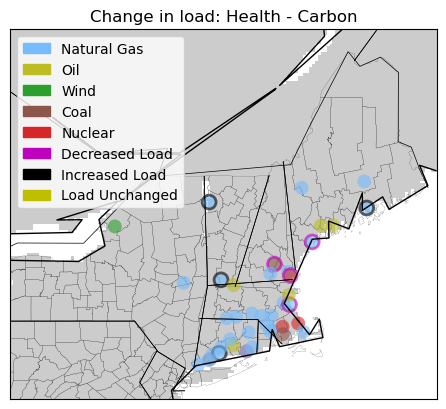

In [14]:

health2 = Basemap(
   projection='merc', llcrnrlat=min(latitude)-0.75, urcrnrlat=max(latitude)+3,
   llcrnrlon=min(longitude)-3, urcrnrlon=max(longitude)+2, resolution='c')

health2.drawcoastlines()
health2.drawstates()
health2.drawcounties()
health2.drawcountries()
health2.drawlsmask(land_color='0.8', ocean_color='w', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=5)



# first graph based on original
x, y = health2(longitude, latitude)  # Projecting latitudes and longitudes to map coordinates
health2.scatter(x, y,s=100,c=colors, cmap='viridis', marker='o', alpha=0.6, edgecolor=borders_low,linewidth=linewidths_low)
# m.scatter(x,y,3,marker='o',color='k')


# Adding a colorbar to represent the data values
# plt.colorbar(label='Data Values')

natGas = mpatches.Patch(color='xkcd:sky blue', label='Natural Gas')
oil = mpatches.Patch(color='tab:olive', label='Oil')
wind = mpatches.Patch(color='tab:green', label='Wind')
bit = mpatches.Patch(color='tab:brown', label='Coal')
nuc = mpatches.Patch(color='tab:red', label='Nuclear')
pink = mpatches.Patch(color='m', label='Decreased Load')
black = mpatches.Patch(color='k', label='Increased Load')
yell = mpatches.Patch(color='y', label='Load Unchanged')

plt.legend(handles=[natGas,oil,wind,bit,nuc, pink, black,yell])

# Display the map with plotted data
plt.title('Change in load: Health - Carbon')
plt.show()

/var/folders/_h/gc6w8m4s5m53hzmb_9s77s980000gp/T/ipykernel_23229/2919342271.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  health_highdiff.scatter(x, y,s=100,c=colors, cmap='viridis', marker='o', alpha=0.6, edgecolor=borders_high,linewidths=linewidths_high)


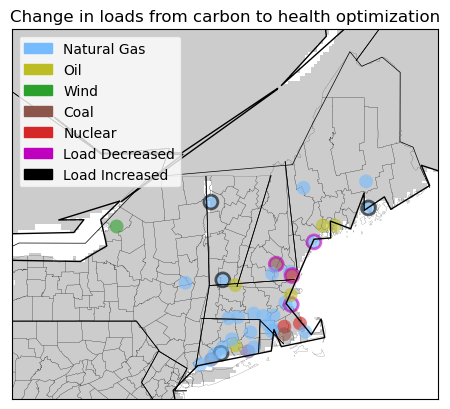

In [15]:
health_highdiff = Basemap(
   projection='merc', llcrnrlat=min(latitude)-0.75, urcrnrlat=max(latitude)+3,
   llcrnrlon=min(longitude)-3, urcrnrlon=max(longitude)+2, resolution='c')

health_highdiff.drawcoastlines()
health_highdiff.drawstates()
health_highdiff.drawcounties()
health_highdiff.drawcountries()
health_highdiff.drawlsmask(land_color='0.8', ocean_color='w', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=5)



# first graph based on original
x, y = health_highdiff(longitude, latitude)  # Projecting latitudes and longitudes to map coordinates
health_highdiff.scatter(x, y,s=100,c=colors, cmap='viridis', marker='o', alpha=0.6, edgecolor=borders_high,linewidths=linewidths_high)
# m.scatter(x,y,3,marker='o',color='k')


# Adding a colorbar to represent the data values
# plt.colorbar(label='Data Values')

natGas = mpatches.Patch(color='xkcd:sky blue', label='Natural Gas')
oil = mpatches.Patch(color='tab:olive', label='Oil')
wind = mpatches.Patch(color='tab:green', label='Wind')
bit = mpatches.Patch(color='tab:brown', label='Coal')
nuc = mpatches.Patch(color='tab:red', label='Nuclear')
pink = mpatches.Patch(color='m', label='Load Decreased')
black = mpatches.Patch(color='k', label='Load Increased')

plt.legend(handles=[natGas,oil,wind,bit,nuc, pink, black])

# Display the map with plotted data
plt.title('Change in loads from carbon to health optimization')
plt.show()

In [ ]:
# plot differences in health costs between health and ogiginal
gen_diff_og_low = np.subtract(gen_low['Generation: Lower Health Bound'],gen_og['Generation: Original Model']) / gen_og['Generation: Original Model']

borders_og_low = []

for i in range(42):
    if(gen_diff_og_low[i] > 0.05):
        borders_og_low.append('k')
    elif(gen_diff_high[i] < -0.05):
        borders_og_low.append('m')
    else:
        borders_og_low.append('y')
# print("low",gen_low['Generation: Lower Health Bound'])
# print("carb",gen_carboncost['Generation: Coarbon Cost'])


/var/folders/_h/gc6w8m4s5m53hzmb_9s77s980000gp/T/ipykernel_15118/3104627964.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  health_oglow.scatter(x, y,s=100,c=colors, cmap='viridis', marker='o', alpha=0.6, edgecolor=borders_og_low)
/Users/elizabethrogers/anaconda3/envs/summer25/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


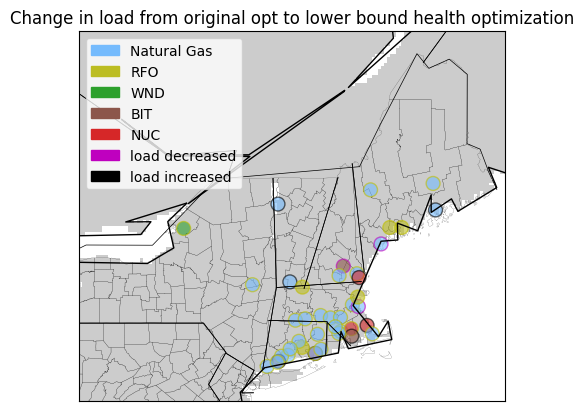

In [ ]:
health_oglow = Basemap(
   projection='merc', llcrnrlat=min(latitude)-0.75, urcrnrlat=max(latitude)+3,
   llcrnrlon=min(longitude)-3, urcrnrlon=max(longitude)+2, resolution='c')

health_oglow.drawcoastlines()
health_oglow.drawstates()
health_oglow.drawcounties()
health_oglow.drawcountries()
health_oglow.drawlsmask(land_color='0.8', ocean_color='w', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=5)



# first graph based on original
x, y = health_oglow(longitude, latitude)  # Projecting latitudes and longitudes to map coordinates
health_oglow.scatter(x, y,s=100,c=colors, cmap='viridis', marker='o', alpha=0.6, edgecolor=borders_og_low)
# m.scatter(x,y,3,marker='o',color='k')


# Adding a colorbar to represent the data values
# plt.colorbar(label='Data Values')

natGas = mpatches.Patch(color='xkcd:sky blue', label='Natural Gas')
oil = mpatches.Patch(color='tab:olive', label='RFO')
wind = mpatches.Patch(color='tab:green', label='WND')
bit = mpatches.Patch(color='tab:brown', label='BIT')
nuc = mpatches.Patch(color='tab:red', label='NUC')
pink = mpatches.Patch(color='m', label='load decreased')
black = mpatches.Patch(color='k', label='load increased')

plt.legend(handles=[natGas,oil,wind,bit,nuc, pink, black])

# Display the map with plotted data
plt.title('Change in load from original opt to lower bound health optimization')
plt.show()

In [16]:
# plot differences in health costs between health and ogiginal
gen_diff_og_high = np.subtract(gen_high['Generation: Upper Health Bound'],gen_og['Generation: Original Model']) / gen_og['Generation: Original Model']

borders_og_high = []
linewidth_og_high = []

for i in range(42):
    if(gen_diff_og_high[i] > 0.05):
        borders_og_high.append('k')
        linewidth_og_high.append(2)
    elif(gen_diff_high[i] < -0.05):
        borders_og_high.append('m')
        linewidth_og_high.append(2)
    else:
        borders_og_high.append('y')
        linewidth_og_high.append(0)
# print("low",gen_low['Generation: Lower Health Bound'])
# print("carb",gen_carboncost['Generation: Coarbon Cost'])

/var/folders/_h/gc6w8m4s5m53hzmb_9s77s980000gp/T/ipykernel_23229/2673950481.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  health_oghigh.scatter(x, y,s=100,c=colors, cmap='viridis', marker='o', alpha=0.6, edgecolor=borders_og_high, linewidth=linewidth_og_high)


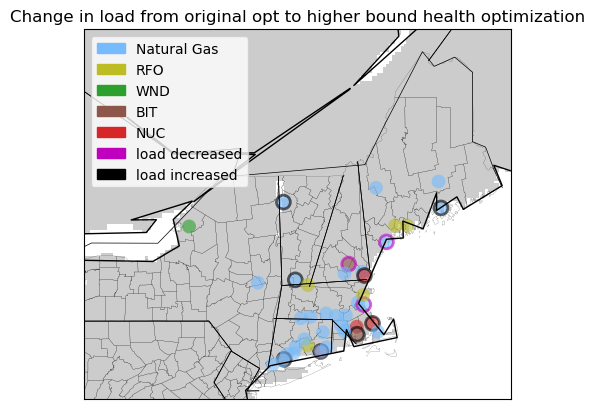

In [17]:
health_oghigh = Basemap(
   projection='merc', llcrnrlat=min(latitude)-0.75, urcrnrlat=max(latitude)+3,
   llcrnrlon=min(longitude)-3, urcrnrlon=max(longitude)+2, resolution='c')

health_oghigh.drawcoastlines()
health_oghigh.drawstates()
health_oghigh.drawcounties()
health_oghigh.drawcountries()
health_oghigh.drawlsmask(land_color='0.8', ocean_color='w', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=5)



# first graph based on original
x, y = health_oghigh(longitude, latitude)  # Projecting latitudes and longitudes to map coordinates
health_oghigh.scatter(x, y,s=100,c=colors, cmap='viridis', marker='o', alpha=0.6, edgecolor=borders_og_high, linewidth=linewidth_og_high)
# m.scatter(x,y,3,marker='o',color='k')


# Adding a colorbar to represent the data values
# plt.colorbar(label='Data Values')

natGas = mpatches.Patch(color='xkcd:sky blue', label='Natural Gas')
oil = mpatches.Patch(color='tab:olive', label='RFO')
wind = mpatches.Patch(color='tab:green', label='WND')
bit = mpatches.Patch(color='tab:brown', label='BIT')
nuc = mpatches.Patch(color='tab:red', label='NUC')
pink = mpatches.Patch(color='m', label='load decreased')
black = mpatches.Patch(color='k', label='load increased')

plt.legend(handles=[natGas,oil,wind,bit,nuc, pink, black])

# Display the map with plotted data
plt.title('Change in load from original opt to higher bound health optimization')
plt.show()

## Finding Costs at different Optimizations

## costs under the carbon optimization

Social cost of carbon + amount of carbon emissions under the carbon optimziation

In [59]:
# finding differences in carbon emissions for each optimization
# carb_emission_delt = np.zeros(4)
# emissions rates in tons/MWh
# print(state)

# change emissions rates to be in tons
BIT_carb = 2.26  / 0.001 /2000
NG_carb = 0.97  / 0.001 / 2000
WND_carb = 0
RFO_carb = 2.46 / 0.001 / 2000
NUC_carb = 0

social_cost_of_carbon = 167.83 # in cost per us ton


carbon_rates_emi = np.array([0.000000000000000000e+00,4.849999999999999867e-01,4.849999999999999867e-01,0.000000000000000000e+00,0.000000000000000000e+00,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,1.229999999999999982e+00,4.849999999999999867e-01,0.000000000000000000e+00,4.849999999999999867e-01,0.000000000000000000e+00,4.849999999999999867e-01,1.229999999999999982e+00,1.229999999999999982e+00,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,1.229999999999999982e+00,4.849999999999999867e-01,1.229999999999999982e+00,4.849999999999999867e-01,4.849999999999999867e-01,0.000000000000000000e+00,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01,0.000000000000000000e+00,4.849999999999999867e-01,0.000000000000000000e+00,4.849999999999999867e-01,4.849999999999999867e-01,4.849999999999999867e-01])
# print(fuel_type)

# first find emission total of cabron optimization
carbon_emissions_generation = gen_carbonemi['Generation: Carbon Emissions']
# carbon_cost_emi = 0
# for i in range(num_gen):
#     if(fuel_type[i] == 'BIT'):
#         carbon_cost_emi+=gen_carbonemi['Generation: Carbon Emissions'][i] * BIT_carb
#     elif(fuel_type[i] == 'NG'):
#         carbon_cost_emi+=gen_carbonemi['Generation: Carbon Emissions'][i] * NG_carb
#     elif(fuel_type[i] == 'RFO'):
#         carbon_cost_emi+=gen_carbonemi['Generation: Carbon Emissions'][i] * RFO_carb
#     else:
#         continue

carbon_cost_emi = np.inner(carbon_rates_emi.transpose(),carbon_emissions_generation)


print("carbon optimization")
print("carbon emissions",carbon_cost_emi) # in lbs of emissions / the one hr

print("cost of carbon emissions",carbon_cost_emi*social_cost_of_carbon)
# print(gen_carbonemi)
# print(gen_carboncost)

carbon optimization
carbon emissions 4211.879244308084
cost of carbon emissions 706879.6935722257


cost of carbon under the carbon optimization

In [60]:
gen_high = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116HighHealthBoundGeneratorresults.csv')
# gen_carboncost = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116carboncostGeneratorresults.csv')
# gen_carbonemi = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116CarbonEMIGeneratorresults.csv')
# print(gen_high[header_name][:])

header_name = 'Generation: Upper Health Bound'
upper_health_bound_generation = gen_high['Generation: Upper Health Bound']
carbon_cost_high = np.inner(carbon_rates_emi.transpose(),upper_health_bound_generation)


print('carbon emissions under high bound generation',carbon_cost_high) # in lbs of emissions / the one hr
print('carbon cost under high bound generation',carbon_cost_high*social_cost_of_carbon) # in lbs of emissions / the one hr

carbon emissions under high bound generation 4394.018003217659
carbon cost under high bound generation 737448.0414800197


operational cost under the carbon optimization function:

In [62]:
gen_og = pd.read_csv('/Users/elizabethrogers/Desktop/powersystemspublichealth/BatchFileCreationCommands/NewEnglandFiles/Fall116originalGeneratorresults.csv')

original_generation = gen_og['Operational Cost']
carbon_cost_original_generation_amounts = np.inner(carbon_rates_emi.transpose(),original_generation)


print('carbon emissions under original generation amounts',carbon_cost_original_generation_amounts) # in lbs of emissions / the one hr
print('carbon cost under original generation amounts',carbon_cost_original_generation_amounts*social_cost_of_carbon) # in lbs of emissions / the one hr

carbon emissions under original generation amounts 5797.804700001102
carbon cost under original generation amounts 973045.5628011851


In [63]:
gen_mix = pd.read_csv('/Users/elizabethrogers/Desktop/powersystemspublichealth/BatchFileCreationCommands/NewEnglandFiles/Fall116mixhighGeneratorresults.csv')

gen_mix = gen_mix['Mixed High Health Bound']
carbon_cost_mix = np.inner(carbon_rates_emi.transpose(),gen_mix)


print('carbon emissions under mix generation amounts',carbon_cost_mix) # in lbs of emissions / the one hr
print('carbon cost under mix generation amounts',carbon_cost_mix*social_cost_of_carbon) # in lbs of emissions / the one hr

carbon emissions under mix generation amounts 4333.075755617884
carbon cost under mix generation amounts 727220.1040653496


In [ ]:
# first find emission total of low health optimization
header_name = 'Generation: Lower Health Bound'
lower_health_bound_generation = gen_low['Generation: Lower Health Bound']
# carbon_cost_low = 0

carbon_cost_low = np.inner(carbon_rates_emi.transpose(),lower_health_bound_generation)

print('carbon_cost_low',carbon_cost_low) # in lbs of emissions / the one hr

carbon_cost_low 4394.0180032176495


In [34]:
# first find emission total of upper health optimization
# print(gen_high[header_name][:])
# gen_og = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116originalGeneratorresults.csv')
# gen_low = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116LowHealthBoundGeneratorresults.csv')
gen_high = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116HighHealthBoundGeneratorresults.csv')
# gen_carboncost = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116carboncostGeneratorresults.csv')
# gen_carbonemi = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116CarbonEMIGeneratorresults.csv')
# print(gen_high[header_name][:])

header_name = 'Generation: Upper Health Bound'
upper_health_bound_generation = gen_high['Generation: Upper Health Bound']
carbon_cost_high = np.inner(carbon_rates_emi.transpose(),upper_health_bound_generation)


print('carbon emissions under high bound generation',carbon_cost_high) # in lbs of emissions / the one hr
print('carbon cost under high bound generation',carbon_cost_high*social_cost_of_carbon) # in lbs of emissions / the one hr

carbon emissions under high bound generation 4394.018003217659
carbon cost under high bound generation 737448.0414800197


## health cost of each optimization

health cost under health aware optimization

In [64]:
# high health function coeffs
coeffs_health_cost = np.array([0.000000000000000000e+00,5.374672536900214936e+01,-4.258879202568449470e-06,0.000000000000000000e+00,0.000000000000000000e+00,1.169189701311780816e+01,0.000000000000000000e+00,7.347969254867244615e+00,0.000000000000000000e+00,2.542076043310961268e+03,9.431389260927623752e+01,0.000000000000000000e+00,1.468668267041863373e+02,0.000000000000000000e+00,5.060653982471302470e+01,1.171227524920292126e+03,4.100082088022261360e+02,1.198595647552330092e+02,1.198595392008270295e+02,1.198594970009089309e+02,1.209862644920456347e+02,9.431390984294216651e+01,1.305604090928568439e+02,9.200488691929001561e+01,6.529653885703654126e+00,2.969650971777558102e+00,2.902176985004795373e+00,4.653662116344436868e+02,8.309684736472624422e+01,1.176945428711305340e+03,1.033338118520234161e+02,1.033337382918494285e+02,0.000000000000000000e+00,1.139189761288192670e+02,8.812038959164412688e+01,1.139190487363875519e+02,1.758232458888930410e+02,3.725641949835650735e+01,0.000000000000000000e+00,3.887818929506671850e+01,1.169192041151896255e+01,1.169196752778281834e+01])

# print(coeffs_health_cost)
# print((coeffs_health_cost.shape))

health cost of carbon optimized generation:

In [69]:
# Find public health cost of carbon optimization
gen_carbonemi = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116CarbonEMIGeneratorresults.csv')
header_name = 'Generation: Carbon Emissions'
carbon_emi_generation = gen_carbonemi['Generation: Carbon Emissions']
# carbon_cost_low = 0

health_cost_carbon= np.inner(coeffs_health_cost.transpose(),carbon_emi_generation)

print('health cost of carbon generation',health_cost_carbon) # in lbs of emissions / the one hr

health cost of carbon generation 1616768.5940702176


In [68]:
# sanity check upper health cost
header_name = 'Generation: Upper Health Bound'
health_high_generation = gen_high[header_name]
# carbon_cost_low = 0

health_cost_high= np.inner(coeffs_health_cost.transpose(),health_high_generation)

print('health_cost_high',health_cost_high) # in lbs of emissions / the one hr

health_cost_high 1556465.9028606953


In [67]:
# sanity check upper health cost
gen_og = pd.read_csv('/Users/elizabethrogers/Desktop/powersystemspublichealth/BatchFileCreationCommands/NewEnglandFiles/Fall116originalGeneratorresults.csv')
original_generation = gen_og['Operational Cost']
# carbon_cost_low = 0

health_cost_og= np.inner(coeffs_health_cost.transpose(),original_generation)

print("health cost of operational optimization",health_cost_og) # in lbs of emissions / the one hr

health cost of operational optimization 1843640.7131972348


In [66]:
gen_mix = pd.read_csv('/Users/elizabethrogers/Desktop/powersystemspublichealth/BatchFileCreationCommands/NewEnglandFiles/Fall116mixhighGeneratorresults.csv')

gen_mix = gen_mix['Mixed High Health Bound']
health_cost_mix = np.inner(coeffs_health_cost.transpose(),gen_mix)

print("health cost of mix optimization",health_cost_mix) # in lbs of emissions / the one hr





health cost of mix optimization 1556708.373684208


## Operational Cost of Each optimization

In [ ]:
# load in cost functions:

gencost = np.array([[0.001,17.500,450.00], [0.001,24.757,1505.67], [0.002,24.400,3342.77], [0.005,30.562,1114.42], [0.001, 25.697,  6313.07], [0.002, 27.100,  1297.89],
[0.005, 27.249, 783.88], [0.002,26.174,  1372.76], [0.006,26.053,   655.13],[0.002,29.298, 3418.85],[0.002, 29.135, 1458.22],
[0.001, 23.899, 4734.80],[0.004, 29.960,  3677.05],[0.001,26.605,  6691.85],[0.002, 26.400,  3342.77],[0.004,   52.785,  7415.02],[0.003,   27.114,  3844.19],
[0.002, 25.878, 1390.96],
[0.003, 21.871, 2841.36],[0.002, 26.558,  1284.25],[0.001,   24.540,  1581.44],[0.002,  25.780, 3523.95], [0.003,   22.330,  2325.41],[0.001,   25.323,  1978.07],[0.005,   26.473,   732.25],[0.002,   26.356,  1347.98], [0.008,   27.364,   550.89],
[0.004, 31.864,  3610.20],[0.001,   25.117,  2036.75],[0.004,   32.314,  3777.33],[0.004,   26.167,   947.57],[0.006,   27.791,   710.04],[0.003,   27.697,  4313.07],[0.005,   26.616,   773.70],[0.002,   26.010,  1398.04], [0.006,   27.475,   721.30],[0.006,   32.756,  1215.71],
[0.002, 25.916,  1460.47],[0.001,   26.918,  6534.03],[0.001,   25.325, 1860.51],[0.002,   25.962,  1438.95],[0.006,   27.924,   713.43]])



17.5


In [48]:
def calculate_gencost(generation_amounts):
    cost = 0
    for i in range(len(gencost)):
        gen = generation_amounts[i]
        cost += gencost[i,0] * gen**2 + gencost[i,1]*gen + gencost[i,2]
    return cost

In [70]:
# sanity check operational health cost
gen_og = pd.read_csv('/Users/elizabethrogers/Desktop/powersystemspublichealth/BatchFileCreationCommands/NewEnglandFiles/Fall116originalGeneratorresults.csv')
original_generation = gen_og['Operational Cost']

print("operational cost of grid:", calculate_gencost(original_generation))

operational cost of grid: 535548.9122328971


In [71]:
header_name = 'Generation: Upper Health Bound'
health_high_generation = gen_high[header_name]
# carbon_cost_low = 0


print("operational cost of health optimization:", calculate_gencost(health_high_generation))

operational cost of health optimization: 553840.3448787286


In [72]:
gen_carbonemi = pd.read_csv('/Users/elizabethrogers/Desktop/RSRG/Generator Outputs/Fall116CarbonEMIGeneratorresults.csv')
carbon_generation = gen_carbonemi['Generation: Carbon Emissions']

print("operational cost of carbon optimization:", calculate_gencost(carbon_generation))

operational cost of carbon optimization: 555708.5782980586


In [74]:
gen_mix = pd.read_csv('/Users/elizabethrogers/Desktop/powersystemspublichealth/BatchFileCreationCommands/NewEnglandFiles/Fall116mixhighGeneratorresults.csv')

gen_mix = gen_mix['Mixed High Health Bound']

print("operational cost of mix optimization",calculate_gencost(gen_mix)) # in lbs of emissions / the one hr

operational cost of mix optimization 553523.5596701456
